In [205]:
!pwd

/Users/neku5162/Desktop/rad_aniso/falc_test


### We calculate the spherical component of the radaition field tensor to tell us the what the anisotropy in the radiation field is. Before calculating this for an entire muram snapshot, let's compute this for a simplified atmosphere.



$J = \frac{1}{4\pi} \int I_v d\Omega$

$J^2_0 = \frac{1}{2\sqrt{2}} \frac{1}{4\pi} \int I_v (3\mu^2 - 1) + 3 Q_v (\mu^2 - 1) d\Omega$

$Re J^2_1 = \frac{\sqrt{3}}{2} \frac{1}{4\pi} \int \sqrt{1-\mu^2}(-\mu cos\chi (I_v + Q_v) + sin\chi U_v) d\Omega$

$Im J^2_1 = \frac{\sqrt{3}}{2} \frac{1}{4\pi} \int \sqrt{1-\mu^2}(-\mu sin\chi (I_v + Q_v) - cos\chi U_v) d\Omega$

$Re J^2_2 = \frac{\sqrt{3}}{4} \frac{1}{4\pi} \int \lbrack cos(2\chi) \lbrack (1-\mu^2)I_v - (1 + \mu^2)Q_v \rbrack + 2sin(2\chi)\mu U_v\rbrack d\Omega$

$Im J^2_2 = \frac{\sqrt{3}}{4} \frac{1}{4\pi} \int \lbrack sin(2\chi) \lbrack (1-\mu^2)I_v - (1 + \mu^2)Q_v \rbrack - 2cos(2\chi)\mu U_v\rbrack d\Omega$



In [176]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [177]:
data1 = fits.open('dirr/temp.fits')
data2 = fits.open('dirr/spectrum.fits')
data3 = fits.open('J00.fits')
data4 = fits.open('J20.fits')
data5 = fits.open('reJ21.fits')
data6 = fits.open('imJ21.fits')
data7 = fits.open('reJ22.fits')
data8 = fits.open('imJ22.fits')

In [178]:
temp = data1[0].data
I = data2[0].data
J00 = data3[0].data
J20 = data4[0].data
reJ21 = data5[0].data
imJ21 = data6[0].data
reJ22 = data7[0].data
imJ22 = data8[0].data

### The simplified atmosphere I'm considering is a modified verison of the FALC_04x04x82.atmos. I modify the middle 2x2 section to have a 1.5x the temperature of the normal FALC. 

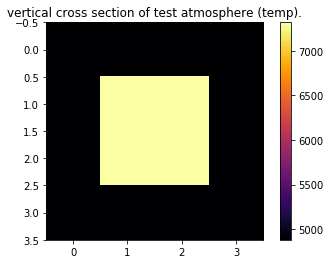

In [179]:
plt.imshow(temp[60,:,:],cmap='inferno')
plt.title('vertical cross section of test atmosphere (temp).')
plt.colorbar()
plt.show()

## This is essentially an idealized granule. Is this physically realistic? I use angleset A_8 which is supposed to give 20 angles per octant. But for some reason I have 40 different rays. Should'nt i have 20*8 = 160?

In [180]:
I.shape

(101, 40, 4, 4)

### Anyway, for the rays that we do have, we can start calculating the angle averaged moments of I

In [181]:
J00.shape

(101, 82, 4, 4)

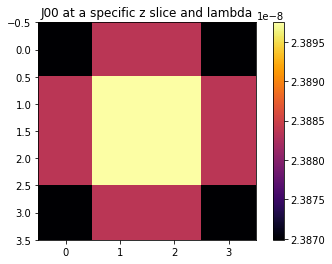

In [192]:
plt.imshow(J00[40,30,:,:],cmap='inferno')
plt.title('J00 at a specific z slice and lambda')
plt.colorbar()
plt.show()

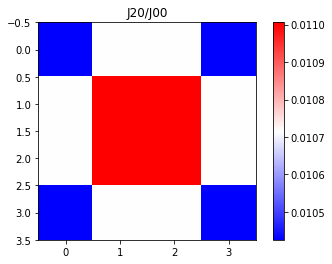

In [193]:
plt.imshow(J20[40,30,:,:]/J00[40,30,:,:],cmap='bwr')
plt.title('J20/J00')
plt.colorbar()
plt.show()

## The vertical anisotrpy ($J^2_0$) is less than $J^0_0$. This makes sense

# Now let's look at the other moments

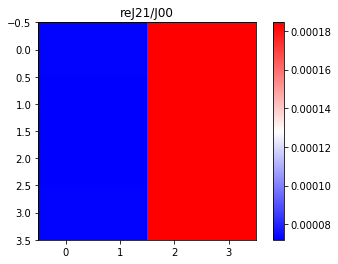

In [194]:
plt.imshow(reJ21[40,30,:,:]/J00[40,30,:,:],cmap='bwr')
plt.title('reJ21/J00')
plt.colorbar()
plt.show()

# Re J21 picks out the vertical anisotropy in the radiation field

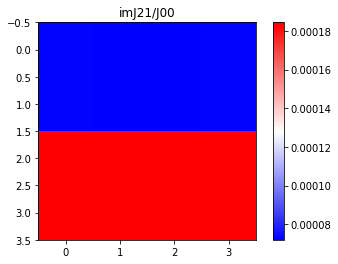

In [195]:
plt.imshow(imJ21[40,30,:,:]/J00[40,30,:,:],cmap='bwr')
plt.title('imJ21/J00')
plt.colorbar()
plt.show()

# Im J21 picks out the vertical anisotropy in the radiation field

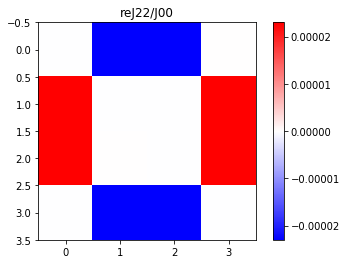

In [196]:
plt.imshow(reJ22[40,30,:,:]/J00[40,30,:,:],cmap='bwr')
plt.title('reJ22/J00')
plt.colorbar()
plt.show()

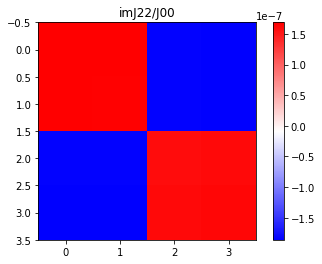

In [198]:
plt.imshow(imJ22[40,30,:,:]/J00[40,30,:,:],cmap='bwr')
plt.title('imJ22/J00')
plt.colorbar()
plt.show()

# J22 picks out some sort of a diagonal anisotropy